# DFA design exercise

DFA that accepts strings which are multiples of 3 in value
and
Contains a 100 in it

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_DFA    import *
from jove.Def_NFA import *
from jove.LangDef    import *  # for testing DFA actions
from jove.Def_RE2NFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
help(mk_nfa)
help(totalize_nfa)
help(step_nfa)
help(run_nfa)
help(ec_step_nfa)
help(Eclosure)
help(Echelp)
help(accept

# Mod-3 DFA 

Does it matter whether MSB-first or LSB-first?



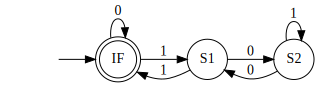

In [4]:
## KEEP DRAWING WHILE YOU FILL !!

DFA3 = md2mc('''DFA

IF : 0 -> IF
IF : 1 -> S1 

S1 : 0 -> S2
S1 : 1 -> IF

S2 : 0 -> S1
S2 : 1 -> S2


''')

dotObj_dfa(DFA3)

# DFA for "contains 100"

In [36]:
DFA100 = md2mc(''' DFA

I : 0 -> I
I : 1 -> S1

S1  : 0 -> S10
S1  : 1 -> S1

S10 : 0 -> F
S10 : 1 -> S1


F   : 0|1 -> F

''')

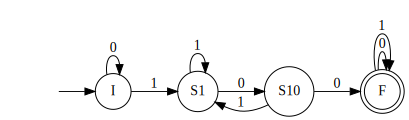

In [5]:
dotObj_dfa(DFA100)

In [6]:
help(intersect_dfa)

Help on function intersect_dfa in module jove.Def_DFA:

intersect_dfa(D1in, D2in)
    In : D1in (consistent DFA)
         D2in (consistent DFA)
    Out: DFA for language intersection of D1in, D2in (consistent DFA).



In [7]:
DFA3_100 = intersect_dfa(DFA3, DFA100)

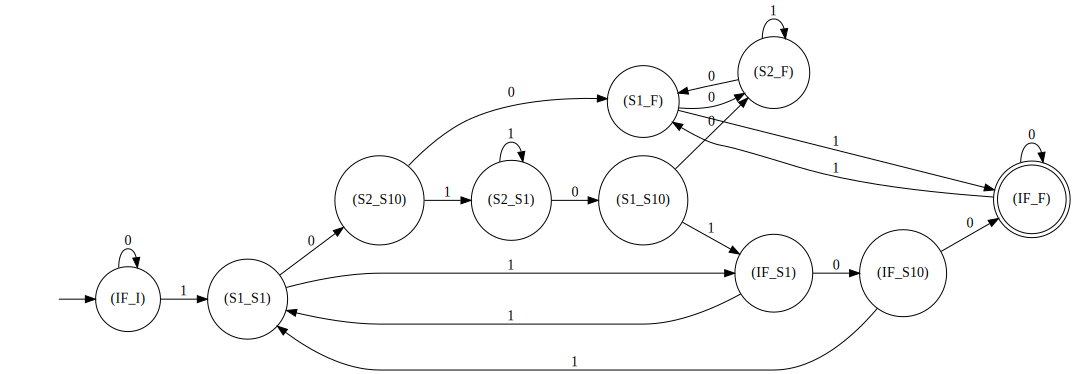

In [10]:
min_DFA3_100 = min_dfa(DFA3_100)
dotObj_dfa(min_DFA3_100)

In [11]:
len(DFA3_100["Q"])

10

In [12]:
len(min_DFA3_100["Q"])

10

# Even the min DFA can be large!

# Illustrate REs to generate test DFA

In [18]:
re2nfa('00*(0+1*)')

Generating LALR tables


{'Q': {'St1', 'St10', 'St2', 'St3', 'St4', 'St5', 'St6', 'St7', 'St8', 'St9'},
 'Sigma': {'0', '1'},
 'Delta': {('St1', '0'): {'St2'},
  ('St5', ''): {'St10', 'St3', 'St6'},
  ('St3', '0'): {'St4'},
  ('St4', ''): {'St5'},
  ('St2', ''): {'St5'},
  ('St6', '0'): {'St7'},
  ('St10', ''): {'St8'},
  ('St8', '1'): {'St9'},
  ('St9', ''): {'St10'}},
 'Q0': {'St1'},
 'F': {'St10', 'St7'}}

In [19]:
nd = nfa2dfa(re2nfa('00*(0+1*)'))

Generating LALR tables


In [26]:
mnd = min_dfa(nd, state_name_mode='verbose')

In [27]:
help(min_dfa)

Help on function min_dfa in module jove.Def_DFA:

min_dfa(D, state_name_mode='succinct')
    In : D (consistent DFA to be minimized)
    Out: Minimized version of D.
    The top-level callable DFA minimizer.
    Given a DFA D, go through the state minimization algorithm.
    state_name_mode is 'verbose' or 'succinct', producing two 
    variants, as you can guess.
    If the state_name_mode is verbose, we will make state names
    by stringing together the state names in the equivalence
    classes. Else we keep the name of the representative of 
    eqch equivalence class.



In [28]:
len(nd["Q"])

5

In [29]:
len(mnd["Q"])

4

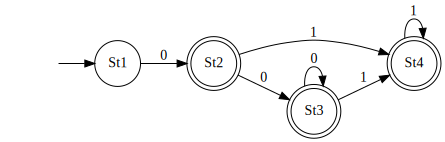

In [32]:
dotObj_dfa(nd, STATENAME_MAXSIZE=40)

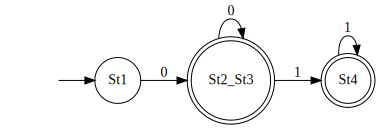

In [33]:
dotObj_dfa(mnd)